51603024_ Hoàng Quốc Bảo

51800009_ Nguuyễn Văn Anh

# Phân tích thống kê trên dữ liệu, vẽ các đồ thị để hiểu bài toán, hiểu dữ liệu. Tìm hiểu các đặc trưng và đánh gía vai trò của các đặc trưng đối với mục tiêu bài toán

In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

In [ ]:
#tạo quyền truy cập với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('/content/drive/MyDrive/PSC.csv')



# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa        Mở       Cao      Thấp
0     30/12/2022  13,500.0  13,100.0  13,500.0  13,100.0
1     29/12/2022  14,500.0  14,700.0  14,700.0  14,500.0
2     28/12/2022  14,400.0  14,400.0  14,400.0  14,400.0
3     27/12/2022  14,000.0  14,000.0  14,000.0  14,000.0
4     26/12/2022  13,200.0  13,200.0  13,200.0  13,200.0
...          ...       ...       ...       ...       ...
1070  14/02/2012   4,276.0   4,276.0   4,276.0   4,276.0
1071  13/02/2012   4,061.0   4,061.0   4,061.0   4,061.0
1072  10/02/2012   3,953.0   3,917.0   3,953.0   3,917.0
1073  10/01/2012   3,809.0   3,809.0   3,809.0   3,809.0
1074  05/01/2012   3,809.0   3,809.0   3,809.0   3,809.0

[1075 rows x 5 columns]


In [ ]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

(1075, 5)

In [ ]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở,Cao,Thấp
0,2022-12-30,"13,500.0","13,100.0","13,500.0","13,100.0"
1,2022-12-29,"14,500.0","14,700.0","14,700.0","14,500.0"
2,2022-12-28,"14,400.0","14,400.0","14,400.0","14,400.0"
3,2022-12-27,"14,000.0","14,000.0","14,000.0","14,000.0"
4,2022-12-26,"13,200.0","13,200.0","13,200.0","13,200.0"


In [ ]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ngày      1075 non-null   datetime64[ns]
 1   Đóng cửa  1075 non-null   object        
 2   Mở        1075 non-null   object        
 3   Cao       1075 non-null   object        
 4   Thấp      1075 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 42.1+ KB


In [ ]:
#mô tả bộ dữ liệu
df.describe()

<ipython-input-8-36b00b1f613d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Ngày,Đóng cửa,Mở,Cao,Thấp
count,1075,1075,1075,1075,1075
unique,1075,321,340,328,322
top,2022-12-30 00:00:00,"7,618.0","13,500.0","7,618.0","13,500.0"
freq,1,35,31,31,34
first,2012-01-05 00:00:00,NaN,NaN,NaN,NaN
last,2022-12-30 00:00:00,NaN,NaN,NaN,NaN


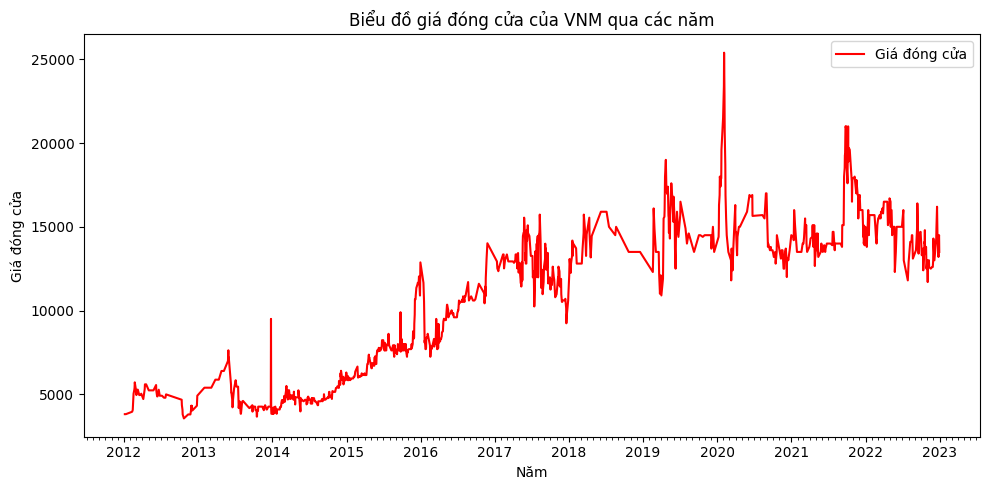

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở'] = df['Mở'].str.replace(',', '').astype(float)
df['Cao'] = df['Cao'].str.replace(',', '').astype(float)
df['Thấp'] = df['Thấp'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


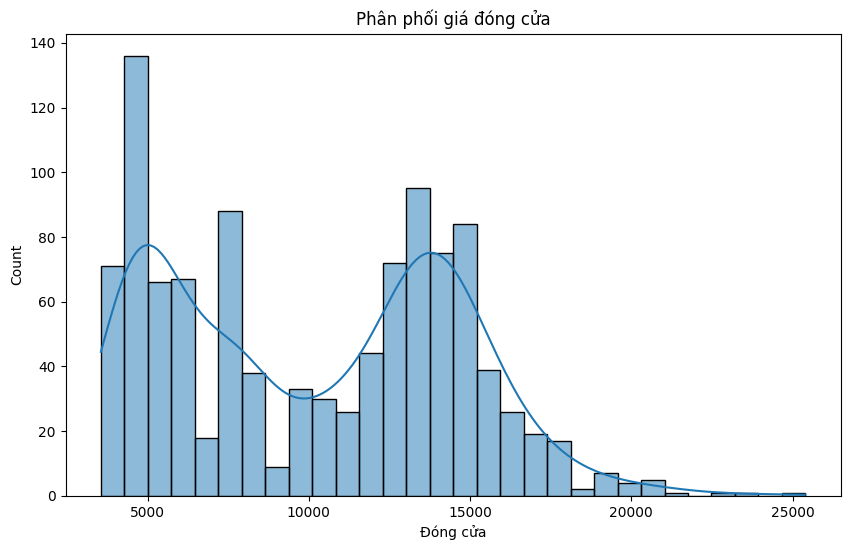

In [ ]:
# Vẽ biểu đồ phân phối giá đóng cửa
plt.figure(figsize=(10, 6))
sns.histplot(df['Đóng cửa'], bins=30, kde=True)
plt.title('Phân phối giá đóng cửa')
plt.show()


<ipython-input-41-690e1dff5493>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


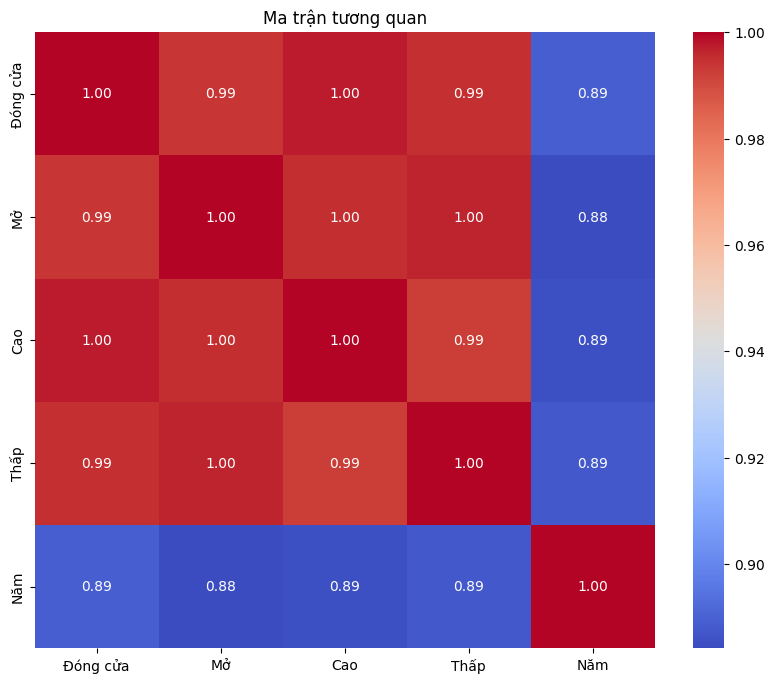

In [ ]:
# Vẽ biểu đồ tương quan giữa các đặc trưng
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan')
plt.show()

In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2012-01-05,3809.0
2012-01-10,3809.0
2012-02-10,3953.0
2012-02-13,4061.0
2012-02-14,4276.0
...,...
2022-12-26,13200.0
2022-12-27,14000.0
2022-12-28,14400.0


In [ ]:
#chia tập dữ liệu
data = df1.values
train_data = data[:663]
test_data = data[663:]

In [ ]:
data

array([[ 3809.],
       [ 3809.],
       [ 3953.],
       ...,
       [14400.],
       [14500.],
       [13500.]])

In [ ]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau


In [ ]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
print("Kích thước x_train:", x_train.shape)
print("Kích thước y_train:", y_train.shape)

Kích thước x_train: (660, 200)
Kích thước y_train: (660,)


In [ ]:
#xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [ ]:

print("Kích thước x_train:", x_train.shape)
print("Kích thước y_train:", y_train.shape)

Kích thước x_train: (660, 200, 1)
Kích thước y_train: (660, 1)


#	Sử dụng Feed Forward Neural Network và Reccurent Neural Network

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
#huấn luyện mô hình
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2)

Epoch 1/100
13/13 - 6s - loss: 0.0687 - 6s/epoch - 429ms/step
Epoch 2/100
13/13 - 0s - loss: 0.0375 - 122ms/epoch - 9ms/step
Epoch 3/100
13/13 - 0s - loss: 0.0352 - 102ms/epoch - 8ms/step
Epoch 4/100
13/13 - 0s - loss: 0.0322 - 98ms/epoch - 8ms/step
Epoch 5/100
13/13 - 0s - loss: 0.0327 - 89ms/epoch - 7ms/step
Epoch 6/100
13/13 - 0s - loss: 0.0348 - 88ms/epoch - 7ms/step
Epoch 7/100
13/13 - 0s - loss: 0.0306 - 88ms/epoch - 7ms/step
Epoch 8/100
13/13 - 0s - loss: 0.0288 - 90ms/epoch - 7ms/step
Epoch 9/100
13/13 - 0s - loss: 0.0321 - 110ms/epoch - 8ms/step
Epoch 10/100
13/13 - 0s - loss: 0.0297 - 131ms/epoch - 10ms/step
Epoch 11/100
13/13 - 0s - loss: 0.0303 - 140ms/epoch - 11ms/step
Epoch 12/100
13/13 - 0s - loss: 0.0292 - 122ms/epoch - 9ms/step
Epoch 13/100
13/13 - 0s - loss: 0.0291 - 118ms/epoch - 9ms/step
Epoch 14/100
13/13 - 0s - loss: 0.0308 - 126ms/epoch - 10ms/step
Epoch 15/100
13/13 - 0s - loss: 0.0279 - 122ms/epoch - 9ms/step
Epoch 16/100
13/13 - 0s - loss: 0.0282 - 116ms/epoch

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
#dự đoán giá đóng cửa trên tập đã train
y_train_predict = model.predict(x_train)
#giá dự đoán
y_train_predict = sc.inverse_transform(y_train_predict)


20/20 [==============================] - 2s 45ms/step


In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
#print(x_test.shape)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[663:] #giá thực
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

13/13 [==============================] - 0s 4ms/step


<ipython-input-22-d094c8486be2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-22-d094c8486be2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


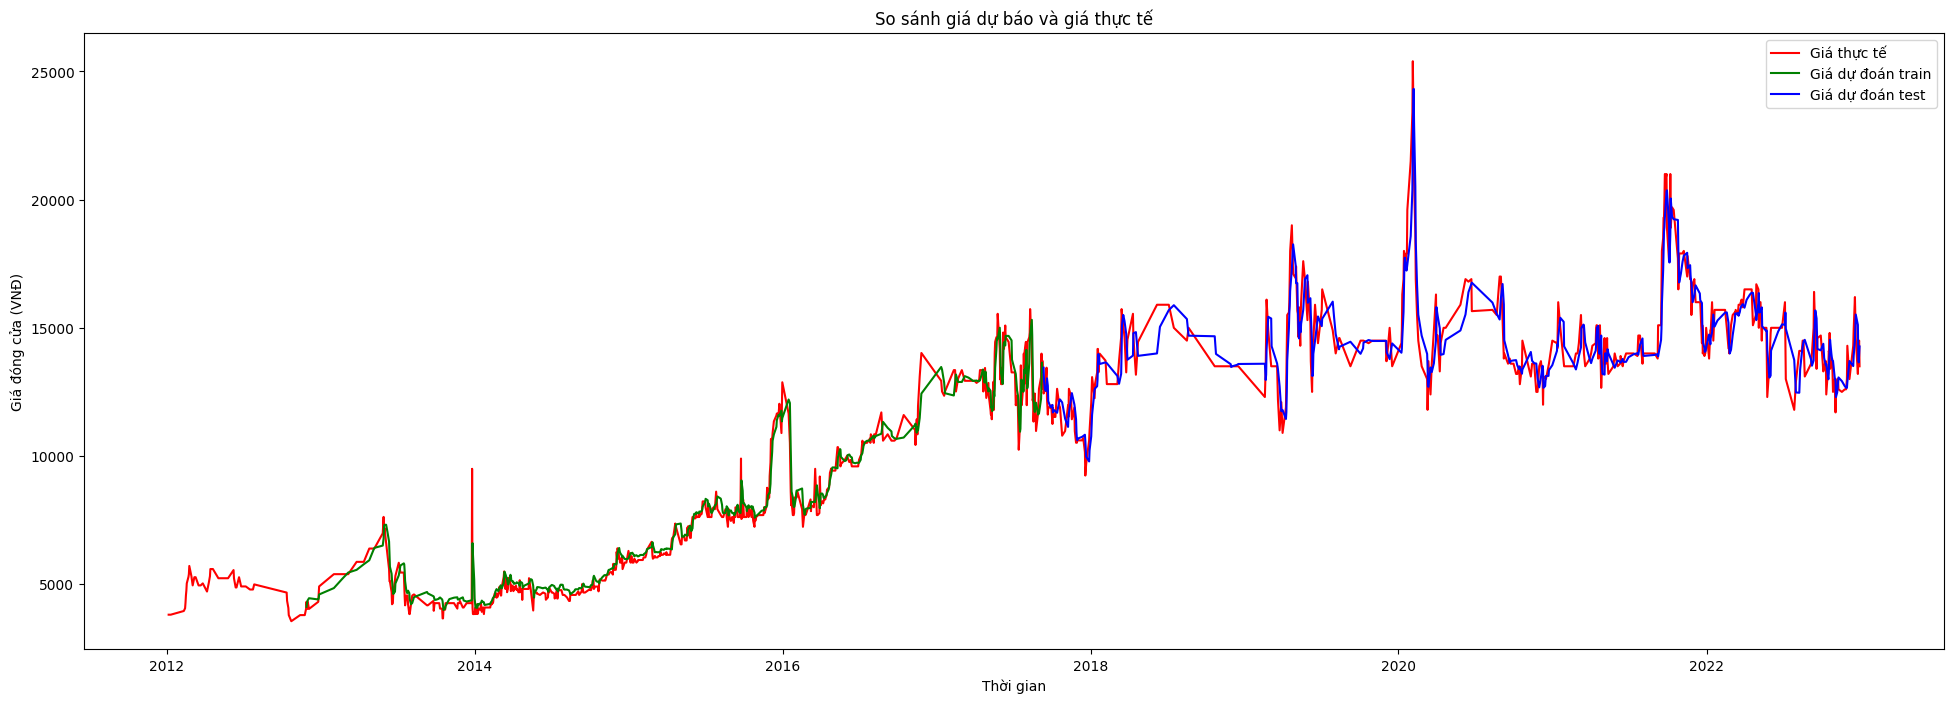

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:663]
test_data1 = df1[663:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.9688965050271237
Sai số tuyệt đối trung bình trên tập train (VNĐ): 359.691085242914
Phần trăm sai số tuyệt đối trung bình tập train: 0.04999629240214388


In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.8101946479941695
Sai số tuyệt đối trung bình trên tập test (VNĐ): 730.9681005385315
Phần trăm sai số tuyệt đối trung bình tập test: 0.04967812019913407


In [ ]:
train_data1

,Đóng cửa,Dự đoán
Ngày,,
2012-11-27,4312.0,4116.004883
2012-11-29,4033.0,4327.877930
2012-11-30,4312.0,4369.731445
2012-12-03,4033.0,4451.736328
2012-12-25,4312.0,4402.456055
...,...,...
2017-08-31,12621.0,11659.597656
2017-09-05,13078.0,12239.422852
2017-09-06,13993.0,12867.272461


In [ ]:
test_data1

,Đóng cửa,Dự đoán
Ngày,,
2017-09-11,12438.0,13443.071289
2017-09-12,12529.0,12930.684570
2017-09-14,12621.0,12614.027344
2017-09-15,12529.0,12552.811523
2017-09-18,13444.0,12540.781250
...,...,...
2022-12-26,13200.0,15114.510742
2022-12-27,14000.0,13910.859375
2022-12-28,14400.0,13652.816406


1/1 [==============================] - 0s 158ms/step


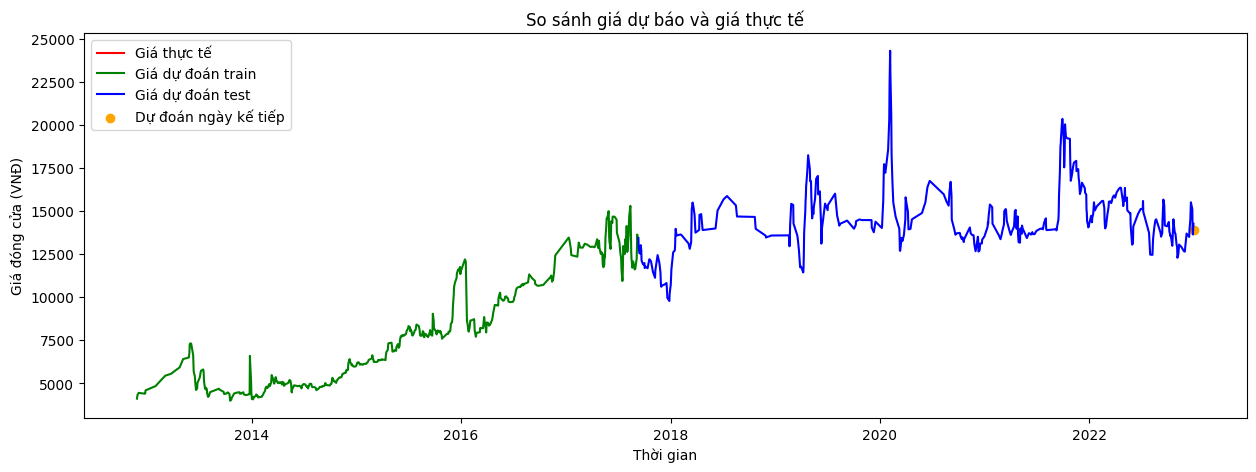

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Ngày   Giá dự đoán  Giá ngày trước
0 2022-12-31  13898.458984         13500.0


In [2]:
# Bước 17: Tạo mô hình MLP
from keras.layers import Flatten
nn_model_no_reshape = Sequential()
nn_model_no_reshape.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
nn_model_no_reshape.add(Dense(256, activation='relu'))
nn_model_no_reshape.add(Dropout(0.5))
nn_model_no_reshape.add(Dense(128, activation='relu'))
nn_model_no_reshape.add(Dropout(0.5))
nn_model_no_reshape.add(Dense(64, activation='relu'))
nn_model_no_reshape.add(Dropout(0.5))
nn_model_no_reshape.add(Dense(1)) # Lớp cuối cùng không có hàm kích hoạt

# Compile the model
nn_model_no_reshape.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mean_absolute_error'])
nn_model_no_reshape.fit(x_train, y_train, epochs=300, batch_size=64, verbose=2)

# Đánh giá kết quả trên tập huấn luyện và tập kiểm tra
y_train_nn_predict = nn_model_no_reshape.predict(x_train)
y_test_nn_predict = nn_model_no_reshape.predict(x_test)

# Đánh giá kết quả trên tập huấn luyện
print('Độ phù hợp tập train (Feed Forward Neural Network):', r2_score(y_train, y_train_nn_predict))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ) (Feed Forward Neural Network):', mean_absolute_error(y_train, y_train_nn_predict))
print('Phần trăm sai số tuyệt đối trung bình tập train (Feed Forward Neural Network):', mean_absolute_percentage_error(y_train, y_train_nn_predict))

# Đánh giá kết quả trên tập kiểm tra
print('Độ phù hợp tập test (Feed Forward Neural Network):', r2_score(y_test, y_test_nn_predict))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ) (Feed Forward Neural Network):', mean_absolute_error(y_test, y_test_nn_predict))
print('Phần trăm sai số tuyệt đối trung bình tập test (Feed Forward Neural Network):', mean_absolute_percentage_error(y_test, y_test_nn_predict))

Epoch 1/300
11/11 - 3s - loss: 119880440.0000 - mean_absolute_error: 10247.2832 - 3s/epoch - 276ms/step
Epoch 2/300
11/11 - 0s - loss: 119533704.0000 - mean_absolute_error: 10233.3730 - 68ms/epoch - 6ms/step
Epoch 3/300
11/11 - 0s - loss: 118228976.0000 - mean_absolute_error: 10180.0566 - 52ms/epoch - 5ms/step
Epoch 4/300
11/11 - 0s - loss: 114049672.0000 - mean_absolute_error: 10007.2266 - 49ms/epoch - 4ms/step
Epoch 5/300
11/11 - 0s - loss: 103660976.0000 - mean_absolute_error: 9567.8271 - 53ms/epoch - 5ms/step
Epoch 6/300
11/11 - 0s - loss: 81796632.0000 - mean_absolute_error: 8534.3467 - 58ms/epoch - 5ms/step
Epoch 7/300
11/11 - 0s - loss: 48801784.0000 - mean_absolute_error: 6593.5903 - 50ms/epoch - 5ms/step
Epoch 8/300
11/11 - 0s - loss: 19176004.0000 - mean_absolute_error: 3896.5857 - 52ms/epoch - 5ms/step
Epoch 9/300
11/11 - 0s - loss: 15673907.0000 - mean_absolute_error: 3243.5989 - 55ms/epoch - 5ms/step
Epoch 10/300
11/11 - 0s - loss: 14062009.0000 - mean_absolute_error: 3109

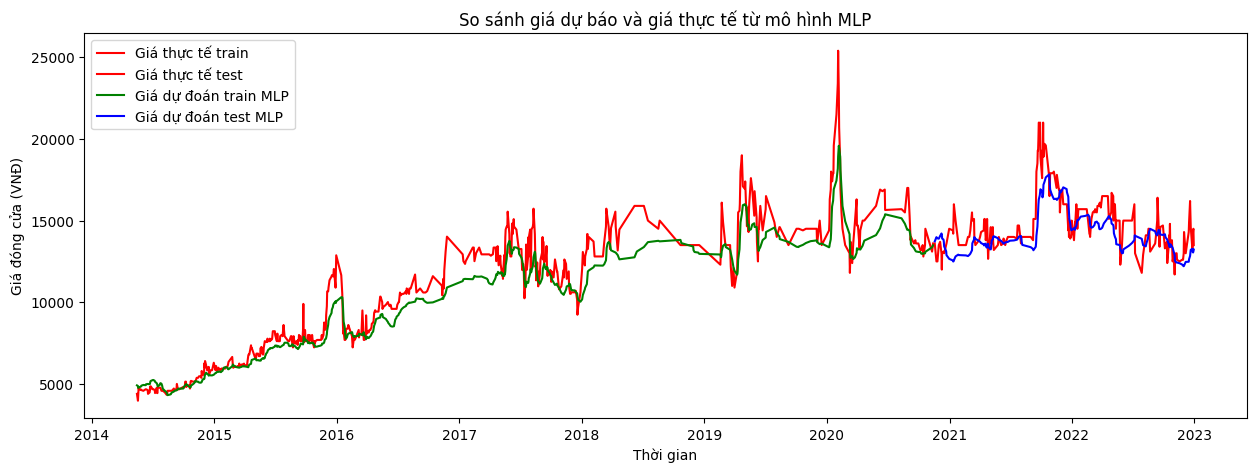

In [3]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán từ mô hình MLP trên tập train và test
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')

# Biểu đồ giá dự đoán trên tập train từ mô hình MLP
plt.plot(train_data1.index, y_train_nn_predict, label='Giá dự đoán train MLP', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình MLP
plt.plot(test_data1.index, y_test_nn_predict, label='Giá dự đoán test MLP', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình MLP')
plt.legend()
plt.show()

In [ ]:

# Dự đoán ngày kế tiếp, 15 ngày sau, 30 ngày sau cho mô hình MLP (model)
x_next_mlp = np.array([next_closing_price_normalized])
y_next_predict_mlp = model.predict(np.reshape(x_next_mlp, (1, x_next_mlp.shape[0], 1)))

# In kết quả dự đoán cho mô hình MLP
print(f'MLP: Dự đoán giá cho ngày {next_date}: {sc.inverse_transform(y_next_predict_mlp)[0][0]} VNĐ')

# Dự đoán cho 15 ngày sau
for i in range(15):
    x_next_mlp = np.array([y_next_predict_mlp[0][0]])
    y_next_predict_mlp = model.predict(np.reshape(x_next_mlp, (1, x_next_mlp.shape[0], 1)))

print(f'MLP: Dự đoán giá cho 15 ngày sau: {sc.inverse_transform(y_next_predict_mlp)[0][0]} VNĐ')

# Dự đoán cho 30 ngày sau
for i in range(15):
    x_next_mlp = np.array([y_next_predict_mlp[0][0]])
    y_next_predict_mlp = model.predict(np.reshape(x_next_mlp, (1, x_next_mlp.shape[0], 1)))

print(f'MLP: Dự đoán giá cho 30 ngày sau: {sc.inverse_transform(y_next_predict_mlp)[0][0]} VNĐ')

1/1 [==============================] - 1s 1s/step
MLP: Dự đoán giá cho ngày 2022-12-31 00:00:00: 7044.857421875 VNĐ
1/1 [==============================] - 0s 30ms/step
MLP: Dự đoán giá cho 15 ngày sau: 5668.9765625 VNĐ
1/1 [==============================] - 0s 19ms/step
MLP: Dự đoán giá cho 30 ngày sau: 5668.9765625 VNĐ


#	Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing

In [4]:
# Import thư viện Linear Regression
from sklearn.linear_model import LinearRegression

# Tạo mô hình Linear Regression
lr = LinearRegression()

# Huấn luyện mô hình Linear Regression trên tập dữ liệu
x_train = np.squeeze(x_train)
y_train = np.squeeze(y_train)
lr.fit(x_train, y_train)

# Dự đoán giá đóng cửa của ngày kế tiếp
x_test = np.squeeze(x_test)
y_test_predict_lr = lr.predict(x_test)
y_train_predict_lr = lr.predict(x_train)
# So sánh kết quả dự đoán với giá thực tế
print('Độ phù hợp tập test:', r2_score(y_test, y_test_predict_lr))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):', mean_absolute_error(y_test, y_test_predict_lr))
print('Phần trăm sai số tuyệt đối trung bình tập test:', mean_absolute_percentage_error(y_test, y_test_predict_lr))

print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict_lr))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict_lr))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict_lr))

Độ phù hợp tập test: 0.63102836157572
Sai số tuyệt đối trung bình trên tập test (VNĐ): 886.5141800202395
Phần trăm sai số tuyệt đối trung bình tập test: 0.060071472844267275
Độ phù hợp tập train: 0.9816637115450383
Sai số tuyệt đối trung bình trên tập train (VNĐ): 396.60360191603513
Phần trăm sai số tuyệt đối trung bình tập train: 0.04041982288545185


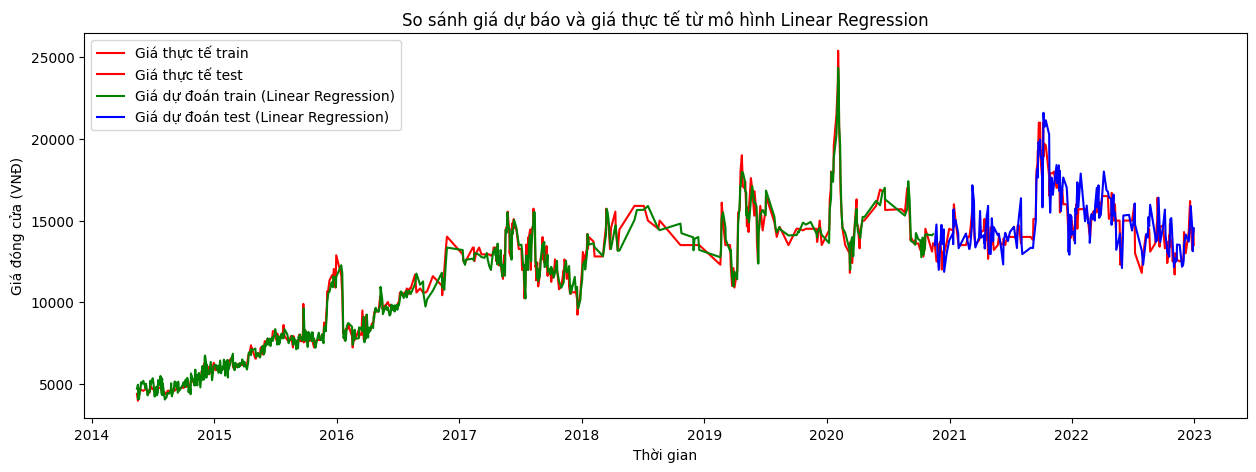

In [5]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_predict_lr, label='Giá dự đoán train (Linear Regression)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_predict_lr, label='Giá dự đoán test (Linear Regression)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình Linear Regression')
plt.legend()
plt.show()

In [6]:
from sklearn.linear_model import Lasso

# Tạo mô hình Lasso Regression
lasso = Lasso(alpha=0.1)  # Điều chỉnh alpha tùy theo mức độ chính quy hóa

# Huấn luyện mô hình Lasso Regression trên tập dữ liệu
lasso.fit(x_train, y_train)

# Dự đoán giá đóng cửa của ngày kế tiếp và tập train
y_test_predict_lasso = lasso.predict(x_test)
y_train_predict_lasso = lasso.predict(x_train)

# So sánh kết quả dự đoán với giá thực tế
print('Độ phù hợp tập test (Lasso Regression):', r2_score(y_test, y_test_predict_lasso))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ) (Lasso Regression):', mean_absolute_error(y_test, y_test_predict_lasso))
print('Phần trăm sai số tuyệt đối trung bình tập test (Lasso Regression):', mean_absolute_percentage_error(y_test, y_test_predict_lasso))

print('Độ phù hợp tập train (Lasso Regression):', r2_score(y_train, y_train_predict_lasso))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ) (Lasso Regression):', mean_absolute_error(y_train, y_train_predict_lasso))
print('Phần trăm sai số tuyệt đối trung bình tập train (Lasso Regression):', mean_absolute_percentage_error(y_train, y_train_predict_lasso))

Độ phù hợp tập test (Lasso Regression): 0.6779296483192541
Sai số tuyệt đối trung bình trên tập test (VNĐ) (Lasso Regression): 826.5176311001545
Phần trăm sai số tuyệt đối trung bình tập test (Lasso Regression): 0.056003432921993904
Độ phù hợp tập train (Lasso Regression): 0.9811681904028096
Sai số tuyệt đối trung bình trên tập train (VNĐ) (Lasso Regression): 397.48070054837433
Phần trăm sai số tuyệt đối trung bình tập train (Lasso Regression): 0.03933396598455005


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.555e+07, tolerance: 9.823e+05
  model = cd_fast.enet_coordinate_descent(


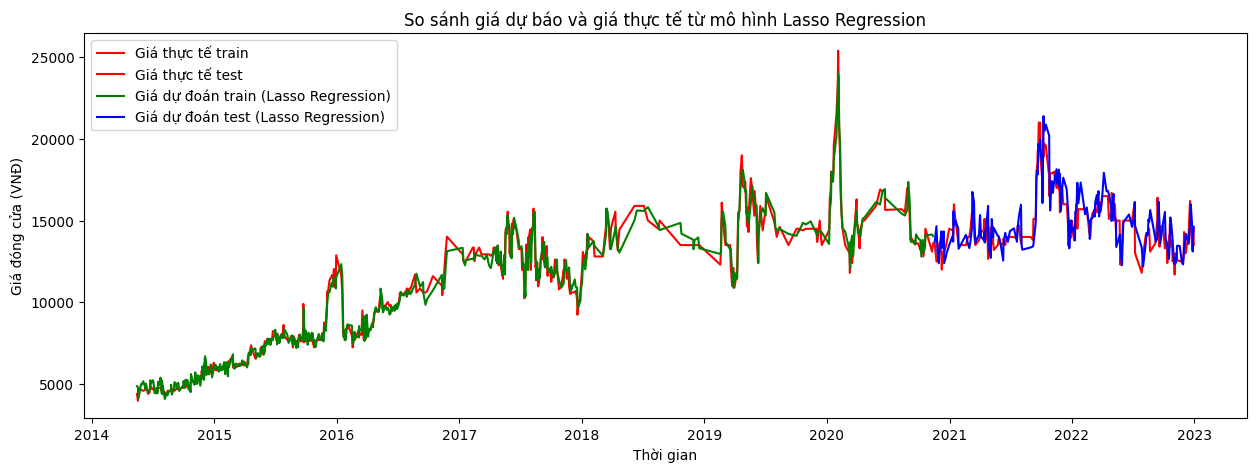

In [9]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Lasso Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Lasso Regression
plt.plot(train_data1.index, y_train_predict_lasso, label='Giá dự đoán train (Lasso Regression)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Lasso Regression
plt.plot(test_data1.index, y_test_predict_lasso, label='Giá dự đoán test (Lasso Regression)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình Lasso Regression')
plt.legend()
plt.show()


In [10]:
# Import thư viện Random Forests
from sklearn.ensemble import RandomForestRegressor

# Tạo mô hình Random Forests
rf_model = RandomForestRegressor(n_estimators=100)

# Huấn luyện mô hình

rf_model.fit(x_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_rf_predict = rf_model.predict(x_train)
y_test_rf_predict = rf_model.predict(x_test)

# Đánh giá kết quả trên tập huấn luyện
print('Độ phù hợp tập train (Random Forest):', r2_score(y_train, y_train_rf_predict))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ) (Random Forest):', mean_absolute_error(y_train, y_train_rf_predict))
print('Phần trăm sai số tuyệt đối trung bình tập train (Random Forest):', mean_absolute_percentage_error(y_train, y_train_rf_predict))

# Đánh giá kết quả trên tập kiểm tra
print('Độ phù hợp tập test (Random Forest):', r2_score(y_test, y_test_rf_predict))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ) (Random Forest):', mean_absolute_error(y_test, y_test_rf_predict))
print('Phần trăm sai số tuyệt đối trung bình tập test (Random Forest):', mean_absolute_percentage_error(y_test, y_test_rf_predict))

Độ phù hợp tập train (Random Forest): 0.9955584906618742
Sai số tuyệt đối trung bình trên tập train (VNĐ) (Random Forest): 167.69881818181827
Phần trăm sai số tuyệt đối trung bình tập train (Random Forest): 0.014734131216873106
Độ phù hợp tập test (Random Forest): 0.48204954803930966
Sai số tuyệt đối trung bình trên tập test (VNĐ) (Random Forest): 981.4521860465118
Phần trăm sai số tuyệt đối trung bình tập test (Random Forest): 0.06523002792983998


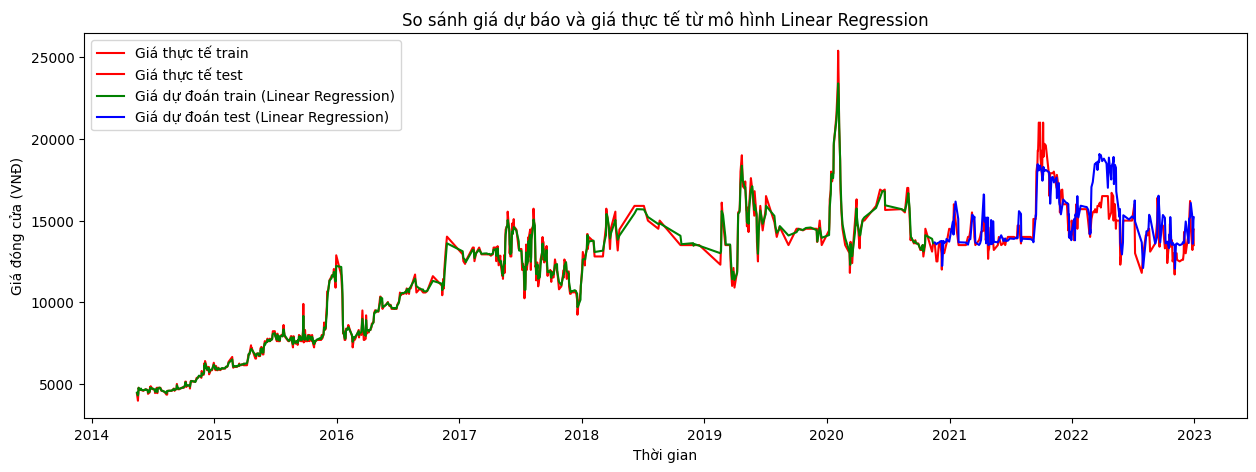

In [11]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_rf_predict, label='Giá dự đoán train (Linear Regression)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_rf_predict, label='Giá dự đoán test (Linear Regression)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình Linear Regression')
plt.legend()
plt.show()

In [12]:
# Thêm thư viện và mô hình AdaBoost vào dự đoán

# Import thư viện AdaBoost
from sklearn.ensemble import AdaBoostRegressor

# Tạo mô hình AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=100, learning_rate=0.01)

# Huấn luyện mô hình trên tập dữ liệu
ab.fit(x_train, y_train)

# Dự đoán giá đóng cửa trên tập dữ liệu test
y_test_predict_ab = ab.predict(x_test)
y_train_predict_ab = ab.predict(x_train)
# So sánh kết quả dự đoán với giá thực tế
print('Độ phù hợp tập test:', r2_score(y_test, y_test_predict_ab))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):', mean_absolute_error(y_test, y_test_predict_ab))
print('Phần trăm sai số tuyệt đối trung bình tập test:', mean_absolute_percentage_error(y_test, y_test_predict_ab))
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict_ab))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict_ab))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict_ab))

Độ phù hợp tập test: 0.3418488013621622
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1026.762397410599
Phần trăm sai số tuyệt đối trung bình tập test: 0.06626545462565027
Độ phù hợp tập train: 0.9688775637183648
Sai số tuyệt đối trung bình trên tập train (VNĐ): 502.69770428637855
Phần trăm sai số tuyệt đối trung bình tập train: 0.04704570956987633


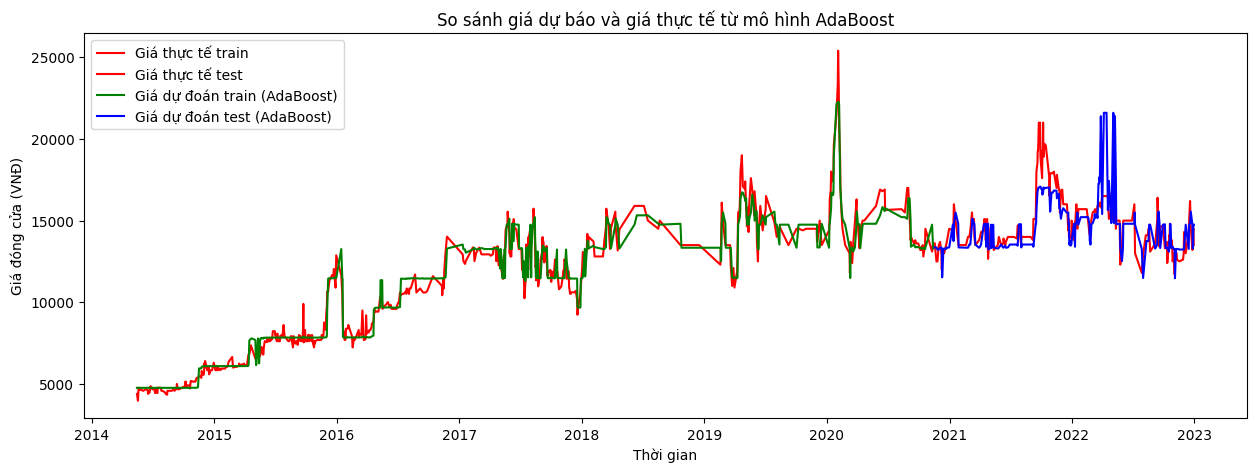

In [14]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình AdaBoost
plt.plot(train_data1.index, y_train_predict_ab, label='Giá dự đoán train (AdaBoost)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình AdaBoost
plt.plot(test_data1.index, y_test_predict_ab, label='Giá dự đoán test (AdaBoost)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình AdaBoost')
plt.legend()
plt.show()

In [15]:
#  Thêm thư viện và mô hình Gradient boosting vào dự đoán

# Import thư viện Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

# Tạo mô hình Gradient boosting giảm overfitting max_depth=3, subsample=0.8
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=3, subsample=0.8)

# Huấn luyện mô hình trên tập dữ liệu
gb.fit(x_train, y_train)

# Dự đoán giá đóng cửa trên tập dữ liệu test
y_test_predict_gb = gb.predict(x_test)
y_train_predict_gb = gb.predict(x_train)
# So sánh giá dự đoán với giá thực tế
print('Độ phù hợp tập test:', r2_score(y_test, y_test_predict_gb))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):', mean_absolute_error(y_test, y_test_predict_gb))
print('Phần trăm sai số tuyệt đối trung bình tập test:', mean_absolute_percentage_error(y_test, y_test_predict_gb))
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict_gb))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict_gb))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict_gb))

Độ phù hợp tập test: -0.1916063521831184
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1619.841432132305
Phần trăm sai số tuyệt đối trung bình tập test: 0.10357204838231206
Độ phù hợp tập train: 0.8392871311811678
Sai số tuyệt đối trung bình trên tập train (VNĐ): 1282.1310609474713
Phần trăm sai số tuyệt đối trung bình tập train: 0.15183320939298187


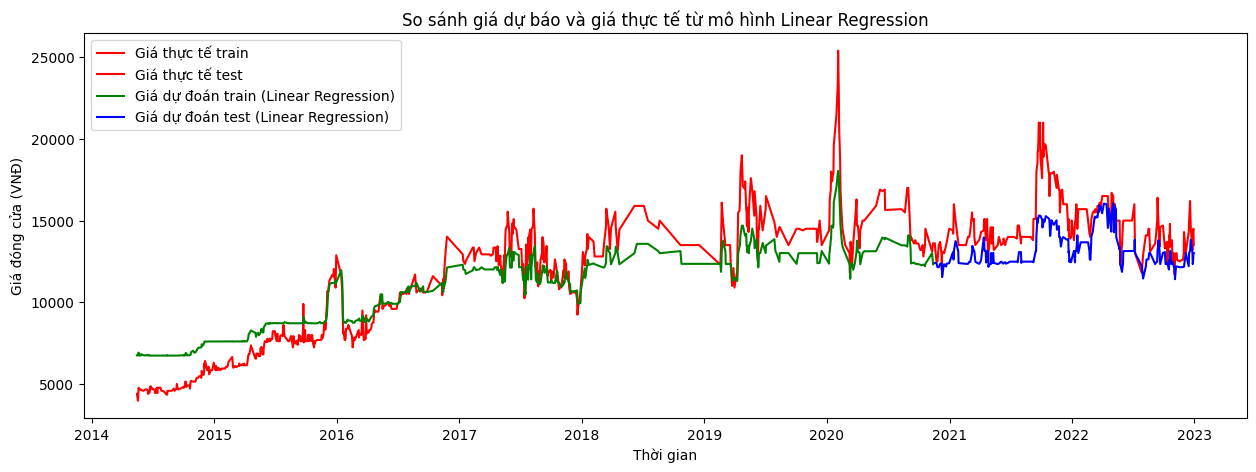

In [16]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_predict_gb, label='Giá dự đoán train (Linear Regression)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_predict_gb, label='Giá dự đoán test (Linear Regression)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình Linear Regression')
plt.legend()
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Bước 16.1: Tạo mô hình KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_train_predict_knn = knn_model.predict(x_train)
y_test_predict_knn = knn_model.predict(x_test)

# Đánh giá kết quả trên tập test cho mô hình KNN
print('Độ phù hợp tập test (KNN):', r2_score(y_test, y_test_predict_knn))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ, KNN):', mean_absolute_error(y_test, y_test_predict_knn))
print('Phần trăm sai số tuyệt đối trung bình tập test (KNN):', mean_absolute_percentage_error(y_test, y_test_predict_knn))

# Đánh giá kết quả trên tập train cho mô hình KNN
print('Độ phù hợp tập train (KNN):', r2_score(y_train, y_train_predict_knn))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ, KNN):', mean_absolute_error(y_train, y_train_predict_knn))
print('Phần trăm sai số tuyệt đối trung bình tập train (KNN):', mean_absolute_percentage_error(y_train, y_train_predict_knn))

# Tương tự, lặp lại quy trình trên cho các mô hình khác như SVR, Decision Trees, Lasso Regression, Ridge Regression.



Độ phù hợp tập test (KNN): -0.9176589628634151
Sai số tuyệt đối trung bình trên tập test (VNĐ, KNN): 1954.6102325581396
Phần trăm sai số tuyệt đối trung bình tập test (KNN): 0.1302235602901276
Độ phù hợp tập train (KNN): 0.9874258609788324
Sai số tuyệt đối trung bình trên tập train (VNĐ, KNN): 283.9766666666667
Phần trăm sai số tuyệt đối trung bình tập train (KNN): 0.025693332478553974


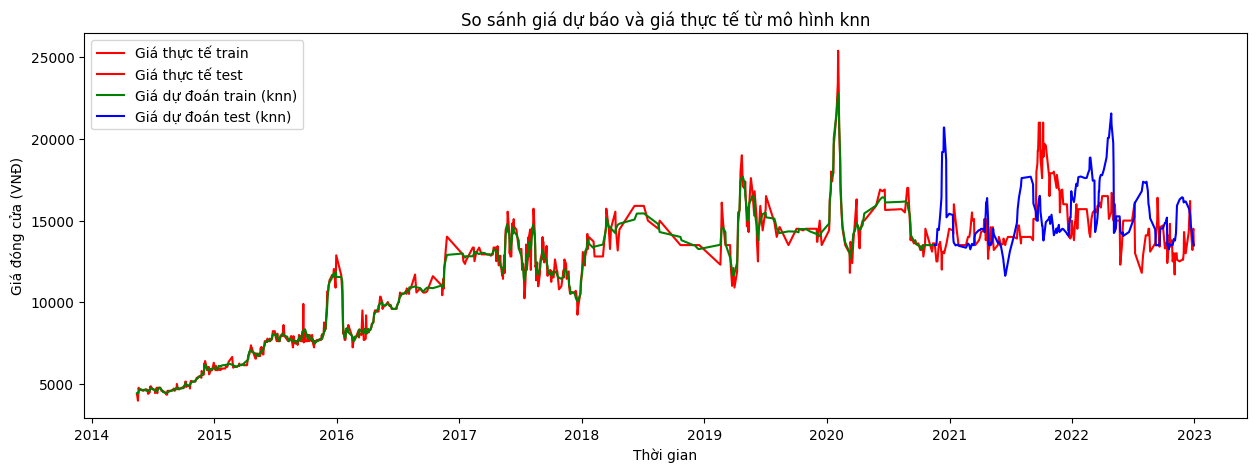

In [40]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_predict_knn, label='Giá dự đoán train (knn)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_predict_knn, label='Giá dự đoán test (knn)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình knn')
plt.legend()
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Bước 16.3: Tạo mô hình Decision Trees
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)
dt_model.fit(x_train, y_train)
y_train_predict_dt = dt_model.predict(x_train)
y_test_predict_dt = dt_model.predict(x_test)

# Đánh giá kết quả trên tập test cho mô hình Decision Trees
print('Độ phù hợp tập test (Decision Trees):', r2_score(y_test, y_test_predict_dt))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ, Decision Trees):', mean_absolute_error(y_test, y_test_predict_dt))
print('Phần trăm sai số tuyệt đối trung bình tập test (Decision Trees):', mean_absolute_percentage_error(y_test, y_test_predict_dt))

# Đánh giá kết quả trên tập train cho mô hình Decision Trees
print('Độ phù hợp tập train (Decision Trees):', r2_score(y_train, y_train_predict_dt))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ, Decision Trees):', mean_absolute_error(y_train, y_train_predict_dt))
print('Phần trăm sai số tuyệt đối trung bình tập train (Decision Trees):', mean_absolute_percentage_error(y_train, y_train_predict_dt))



Độ phù hợp tập test (Decision Trees): -2.3130912740705956
Sai số tuyệt đối trung bình trên tập test (VNĐ, Decision Trees): 2177.1189842374015
Phần trăm sai số tuyệt đối trung bình tập test (Decision Trees): 0.1419090699264167
Độ phù hợp tập train (Decision Trees): 0.9808505265878399
Sai số tuyệt đối trung bình trên tập train (VNĐ, Decision Trees): 360.0869338145314
Phần trăm sai số tuyệt đối trung bình tập train (Decision Trees): 0.03236718286273569


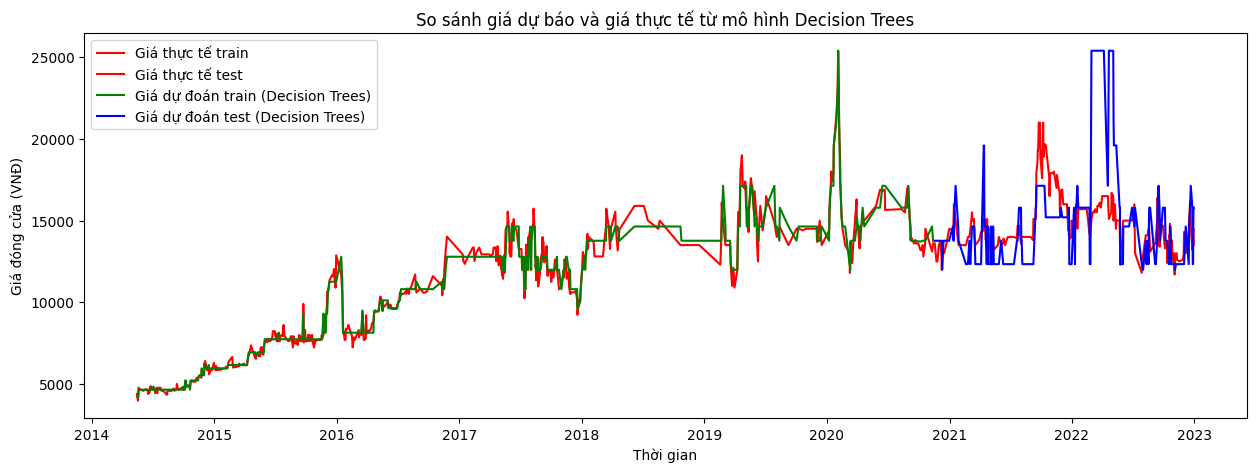

In [42]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_predict_dt, label='Giá dự đoán train (Decision Trees)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_predict_dt, label='Giá dự đoán test (Decision Trees)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình Decision Trees')
plt.legend()
plt.show()

In [23]:
from sklearn.linear_model import Ridge
# Bước 16.5: Tạo mô hình Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(x_train, y_train)
y_train_predict_ridge = ridge_model.predict(x_train)
y_test_predict_ridge = ridge_model.predict(x_test)
# Đánh giá kết quả trên tập test cho mô hình Ridge Regression
print('Độ phù hợp tập test (Ridge Regression):', r2_score(y_test, y_test_predict_ridge))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ, Ridge Regression):', mean_absolute_error(y_test, y_test_predict_ridge))
print('Phần trăm sai số tuyệt đối trung bình tập test (Ridge Regression):', mean_absolute_percentage_error(y_test, y_test_predict_ridge))

# Đánh giá kết quả trên tập train cho mô hình Ridge Regression
print('Độ phù hợp tập train (Ridge Regression):', r2_score(y_train, y_train_predict_ridge))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ, Ridge Regression):', mean_absolute_error(y_train, y_train_predict_ridge))
print('Phần trăm sai số tuyệt đối trung bình tập train (Ridge Regression):', mean_absolute_percentage_error(y_train, y_train_predict_ridge))

Độ phù hợp tập test (Ridge Regression): 0.6439641928303101
Sai số tuyệt đối trung bình trên tập test (VNĐ, Ridge Regression): 872.4695432273141
Phần trăm sai số tuyệt đối trung bình tập test (Ridge Regression): 0.05910265657101082
Độ phù hợp tập train (Ridge Regression): 0.98161792068258
Sai số tuyệt đối trung bình trên tập train (VNĐ, Ridge Regression): 396.317771901726
Phần trăm sai số tuyệt đối trung bình tập train (Ridge Regression): 0.04006910901839703


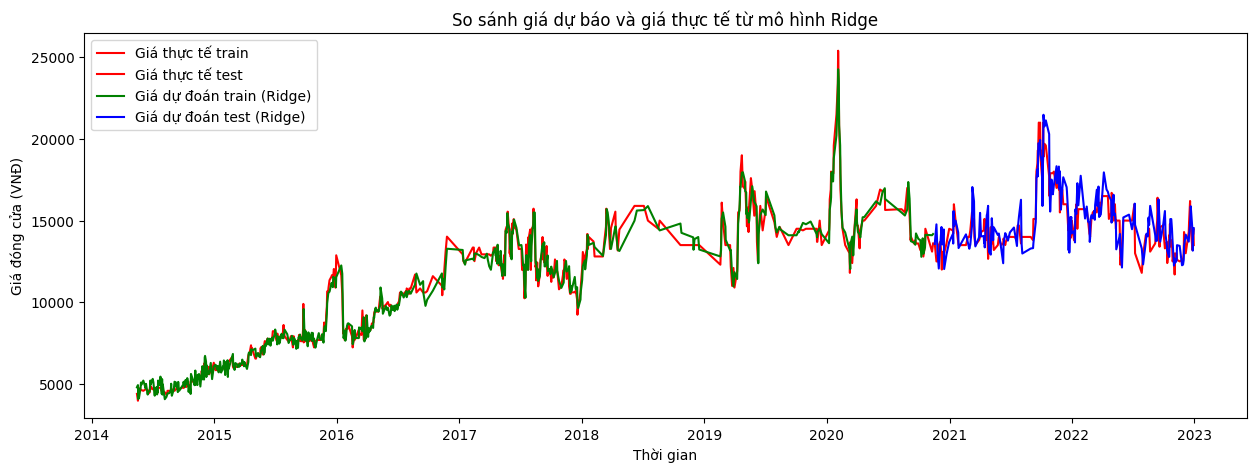

In [34]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_predict_ridge, label='Giá dự đoán train (Ridge)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_predict_ridge, label='Giá dự đoán test (Ridge)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình Ridge')
plt.legend()
plt.show()

In [57]:
from sklearn.svm import SVR

# Bước 16.2: Tạo mô hình Support Vector Regression (SVR)
svr_model = SVR(kernel='linear', C=100, epsilon=0.2)
svr_model.fit(x_train, y_train)
y_train_predict_svr = svr_model.predict(x_train)
y_test_predict_svr = svr_model.predict(x_test)

# Đánh giá kết quả trên tập test cho mô hình SVR
print('Độ phù hợp tập test (SVR):', r2_score(y_test, y_test_predict_svr))
print('Sai số tuyệt đối trung bình trên tập test (VNĐ, SVR):', mean_absolute_error(y_test, y_test_predict_svr))
print('Phần trăm sai số tuyệt đối trung bình tập test (SVR):', mean_absolute_percentage_error(y_test, y_test_predict_svr))

# Đánh giá kết quả trên tập train cho mô hình SVR
print('Độ phù hợp tập train (SVR):', r2_score(y_train, y_train_predict_svr))
print('Sai số tuyệt đối trung bình trên tập train (VNĐ, SVR):', mean_absolute_error(y_train, y_train_predict_svr))
print('Phần trăm sai số tuyệt đối trung bình tập train (SVR):', mean_absolute_percentage_error(y_train, y_train_predict_svr))



Độ phù hợp tập test (SVR): 0.41949308219629866
Sai số tuyệt đối trung bình trên tập test (VNĐ, SVR): 1092.3887693547638
Phần trăm sai số tuyệt đối trung bình tập test (SVR): 0.07504876653254146
Độ phù hợp tập train (SVR): 0.9193187075815468
Sai số tuyệt đối trung bình trên tập train (VNĐ, SVR): 721.2199711847412
Phần trăm sai số tuyệt đối trung bình tập train (SVR): 0.06431160072333715


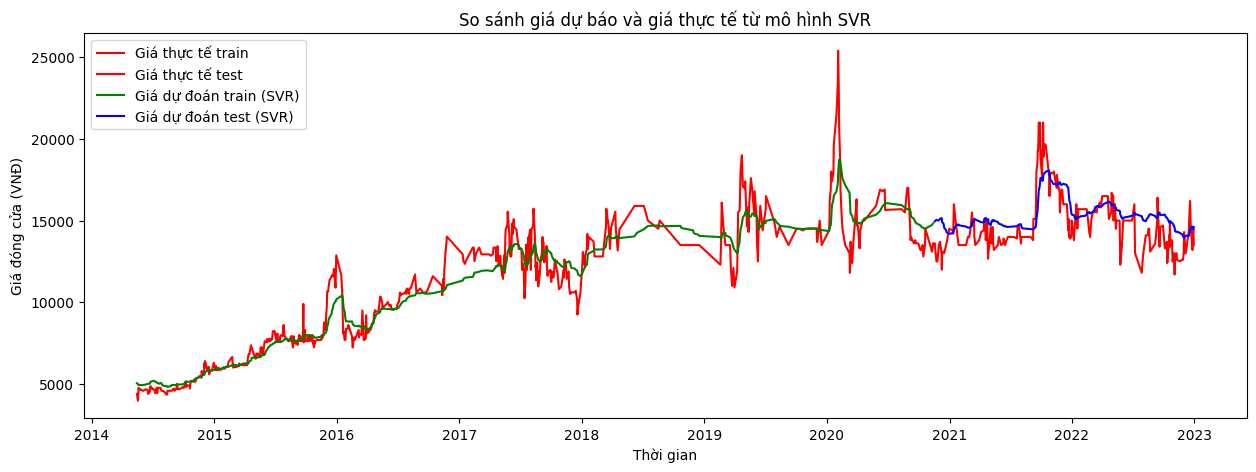

In [58]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá thực tế và giá dự đoán trên tập train và test từ mô hình Linear Regression
plt.figure(figsize=(15, 5))

# Biểu đồ giá thực tế trên tập train và test
#plt.plot(df1.index[200:860], df1['Đóng cửa'][200:860], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Đóng cửa'], label='Giá thực tế train', color='red')

# Biểu đồ giá thực tế trên tập test
plt.plot(test_data1.index, test_data1['Đóng cửa'], label='Giá thực tế test', color='red')
# Biểu đồ giá dự đoán trên tập train từ mô hình Linear Regression
plt.plot(train_data1.index, y_train_predict_svr, label='Giá dự đoán train (SVR)', color='green')

# Biểu đồ giá dự đoán trên tập test từ mô hình Linear Regression
plt.plot(test_data1.index, y_test_predict_svr, label='Giá dự đoán test (SVR)', color='blue')

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế từ mô hình SVR')
plt.legend()
plt.show()